# Table of Contents
* [Project Description](#project_description)
    * [Data Description](#data_description)
* [EDA](#eda)
    * [Pairplot](#pairplot)
* [Building ML Model](#building_ml_model)
    * [Train-Test Split](#train_test_split)
* [ML Models](#ml_model)
    * [Decision Tree](#decision_tree)
    * [Random Forest](#checking_accuracy)
    * [Logistic Regression](#logistic_regression)
* [Sanity Check](#sanity_check)
* [Hyperparameter Tuning](#hyperparameter_tuning)
* [Conclusion](#conclusion)

## Project description
<p>Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.</p>
<p>For this classification task, develop a model that will pick the right plan.</p>

### Data description
<p>Every observation in the dataset contains monthly behavior information about one user.</p>
<p>The information given is as follows:</p>
<li>сalls — number of calls,</li>
<li>minutes — total call duration in minutes,</li>
<li>messages — number of text messages,</li>
<li>mb_used — Internet traffic used in MB,</li>
<li>is_ultra — plan for the current month (Ultra - 1, Smart - 0)</li>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/users_behavior.csv')

## EDA



### Pairplot

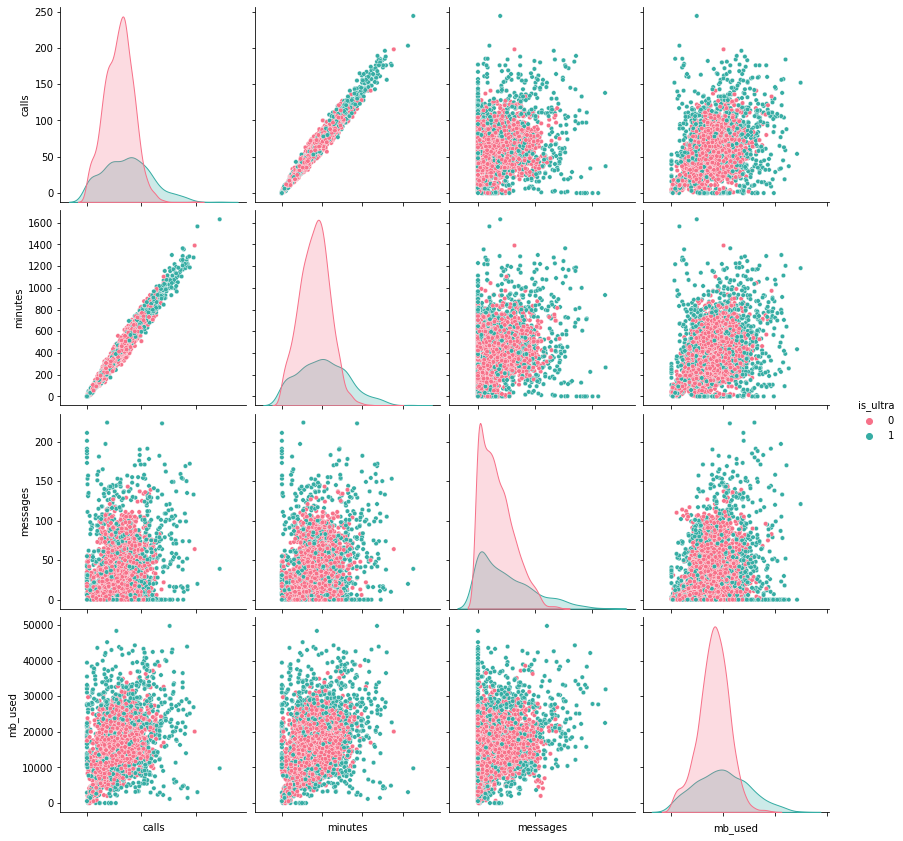

In [ ]:
pp = sns.pairplot(df, hue = 'is_ultra', palette = 'husl', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

* Observations:
* Call and minutes are correlated.
* Smart plan (0) subscribers are dominating feature than Ultra plan (1).

## Building ML Model

In [ ]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

print(features.shape)
print(target.shape)

(3214, 4)
(3214,)


### Train-Test Split

In [ ]:
train_size=0.6

features_train, features_rem, target_train, target_rem = train_test_split(features,target, train_size=0.6)

test_size = 0.2
features_valid, features_test, target_valid, target_test = train_test_split(features_rem,target_rem, test_size=0.2)

print(features_train.shape), print(target_train.shape)
print(features_valid.shape), print(target_valid.shape)
print(features_test.shape), print(target_test.shape)

(1928, 4)
(1928,)
(1028, 4)
(1028,)
(258, 4)
(258,)


(None, None)

In [ ]:
features_train

,calls,minutes,messages,mb_used
3075,39.0,278.79,21.0,11430.52
2574,126.0,832.11,75.0,14550.67
307,54.0,312.85,10.0,7798.27
632,65.0,542.54,3.0,12696.64
1843,25.0,172.08,30.0,7023.20
...,...,...,...,...
1340,32.0,244.80,13.0,7213.58
491,79.0,595.66,30.0,23219.68
2457,60.0,480.72,54.0,11770.17
538,48.0,328.54,25.0,13681.41


In [ ]:
target_train

3075    0
2574    1
307     0
632     1
1843    0
       ..
1340    0
491     0
2457    0
538     0
2235    0
Name: is_ultra, Length: 1928, dtype: int64

## ML Model

We predict that based on the models, subscribers of Megaline will choose Smart as their plan. 

### Decision Tree

In [ ]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features_train, target_train)
y_pred = clf.predict(features_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.7984496124031008


In [ ]:
print("Report : ",classification_report(target_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.80      0.95      0.87       178
           1       0.80      0.46      0.59        80

    accuracy                           0.80       258
   macro avg       0.80      0.71      0.73       258
weighted avg       0.80      0.80      0.78       258



In [ ]:
print("Confusion Matrix: ", confusion_matrix(target_test, y_pred))

Confusion Matrix:  [[169   9]
 [ 43  37]]


* Observations:
* The classification rate using the decision tree model is 80%. 
* As seen in the clasffication report and confusion matrix, subscribers will choose Smart as their plan. 

### Random Forest

In [ ]:
best_score = 0
best_est = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

final_model = RandomForestClassifier(random_state=12345, n_estimators=50, max_features="auto")
final_model.fit(features_train, target_train)

Accuracy of the best model on the validation set (n_estimators = 6): 0.7957198443579766


RandomForestClassifier(n_estimators=50, random_state=12345)

In [ ]:
pred = final_model.predict(features_test)

In [ ]:
imp = final_model.feature_importances_
columns = features.columns
i = 0

while i < len(columns):
    print(f" The important feature '{columns[i]}' is {round(imp [i] * 100, 2)}%.")
    i += 1

 The important feature 'calls' is 19.55%.
 The important feature 'minutes' is 26.1%.
 The important feature 'messages' is 20.01%.
 The important feature 'mb_used' is 34.34%.


* Observations:
* The classification rate using the decision tree model is 79%. 
* The prediction that subscribers will choose Smart as their plan is accurate at 79%.
* Internet usage has the highest predicting feature for subscribers to choose Smart as their plan.

### Logistic Regression

In [ ]:
model = LogisticRegression(random_state=54321, solver="liblinear" ) 
model.fit(features_train, target_train) 
score_train = model.score(features_train, target_train) 
score_valid = model.score(features_valid, target_valid)

print( "Accuracy of the logistic regression model on the training set:", score_train, )
print( "Accuracy of the logistic regression model on the validation set:", score_valid, )

Accuracy of the logistic regression model on the training set: 0.7427385892116183
Accuracy of the logistic regression model on the validation set: 0.7587548638132295


In [ ]:
y_pred = model.predict(features_test)

In [ ]:
print("Report : ",classification_report(target_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(target_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.73      0.99      0.84       178
           1       0.89      0.20      0.33        80

    accuracy                           0.74       258
   macro avg       0.81      0.59      0.58       258
weighted avg       0.78      0.74      0.68       258

Confusion Matrix:  [[176   2]
 [ 64  16]]


* Observations:
* The classification rate using the logistic regression model is 74% for training set and 75% for validation set. 
* The prediction that subscribers will choose Smart as their plan is accurate at 100%.

## Sanity Check

In [ ]:
target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))

0.693528313627878


## Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7558365758754864
max_depth = 2 : 0.7869649805447471
max_depth = 3 : 0.8025291828793775
max_depth = 4 : 0.7996108949416343
max_depth = 5 : 0.8142023346303502


* Observation:
* The model with the best accuracy is Decision Tree at 80%. 
* With the test set, I predict that subscribers will choose Smart plan rather than Ultra. 

## Conclusion

In this sprint project, the task is to develop a model that would analyze the subscribers of Megaline and select Megaline's plans: Smart or Ultra. I build a models using Random Forest, which shows high accuracy for categorical variables. The model accuracy score with 10 decision-trees is 0.8. Checking the dataset for accuracy results to 1.0 and sanity check is 0.7. Therefore, since the target variable Smart plan subscribers dominates or overpowers Ultra plan subscribers, the model with the highest accuracy at 80% predicts Smart plan. 